In [41]:
import pandas as pd

df = pd.read_csv('../_data/phenotype_annotation.tab', sep='\t', low_memory=False)

In [33]:
arr = ['HP:0012086']
arr = arr[0-1]
arr

'HP:0012086'

In [36]:
arr = [
        "HP:0000135",
        "HP:0011446",
        "HP:0003808",
        "HP:0001513",
        "HP:0001513",
        "HP:0011968"
      ]

In [40]:
mylist = list(dict.fromkeys(arr))
print(mylist)

['HP:0000135', 'HP:0011446', 'HP:0003808', 'HP:0001513', 'HP:0011968']


In [ ]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
from scipy.stats import poisson

In [27]:
data_poisson = []

for i in range(1000000):
    data_poisson.append(poisson.rvs(mu=1, size=1)[0])

data_poisson_ = poisson.rvs(mu=1, size=1000000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

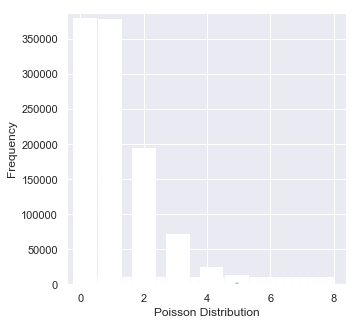

In [28]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

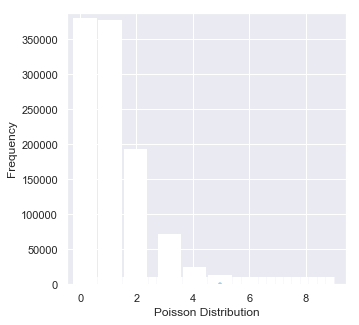

In [29]:
ax = sns.distplot(data_poisson_,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [22]:
data_poisson

[3,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 3,
 0,
 1,
 3,
 2,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 3,
 1,
 2,
 1,
 0,
 2,
 3,
 1,
 2,
 2,
 3,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 3,
 1,
 1,
 0,
 4,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 4,
 1,
 2,
 2,
 4,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 1,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 4,
 1,


In [14]:
import pickle

def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

In [70]:
import json, csv

with open('../_emu/emu-decipher_un_decimo.json') as json_file:
    patient_sims = json.load(json_file)

f = open('../_data/patients/decipher/patients_phenotype.csv', 'w', newline='')
writer = csv.writer(f)

patients_embeddings = []
i = 0

for disease in patient_sims:
    for phenotype in patient_sims[disease]['sims']:
        identifier = 'P' + str(i)
        id_arr = [identifier]
        for symptom in phenotype:
            id_arr.append(symptom)
        writer.writerow(id_arr)
        i += 1
        
f.close()

In [78]:
from sklearn.metrics.pairwise import cosine_similarity 
import numpy as np
import pandas as pd 
import pickle

fn = '../_data/orpha_patients.pkl'
# fn = '../_data/patient_similarities/patient_similarities.pkl'

def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

# patient_embeddings_sum = pd.read_csv(fn, low_memory=False)
# patient_embeddings_avg = load_object(fn)
# patient_embeddings_avg

patient_similarities = load_object(fn)
patient_similarities

# X = []

# for patient in patient_embeddings_avg:
#     X.append(patient_embeddings_avg['patient_embedding'])
    
# X

{'P0': array([-0.7121272 , -0.35789588,  0.24708755,  0.19836822,  0.18537326,
         0.31992397,  0.53672457,  0.04966955, -0.05288663,  0.01476606,
         0.21352354, -0.07486303,  0.4065672 , -0.00649534,  0.19183014,
        -0.08025691,  0.32134438, -0.26754078,  0.30483383,  0.33502144,
         0.02106636, -0.03523719, -0.11593015,  0.04485536, -0.22417887,
         0.33651716, -0.0049685 ,  0.18014444, -0.24053118,  0.27997684,
        -0.0865953 , -0.15270928,  0.02766087,  0.26131064, -0.31798702,
        -0.22258802, -0.06310992, -0.30176336,  0.17726323,  0.37672248,
         0.14427792, -0.31289953, -0.4175159 ,  0.34125227,  0.43279347,
        -0.278933  , -0.26314646, -0.19948618, -0.22370079,  0.07493649,
        -0.03814507,  0.32566622, -0.3090054 ,  0.45899096, -0.3611862 ,
        -0.20568876, -0.09924009, -0.06752262, -0.11850218,  0.40194726,
        -0.07174831,  0.2073184 , -0.10741228, -0.16535024,  0.22339956,
        -0.2461555 , -0.39256576, -0.4561654 

In [41]:
from sklearn.metrics.pairwise import cosine_similarity 

X = [[-0.7121272 , -0.35789588,  0.24708755,  0.19836822,  0.18537326,
          0.31992397,  0.53672457,  0.04966955, -0.05288663,  0.01476606,
          0.21352354, -0.07486303,  0.4065672 , -0.00649534,  0.19183014,
         -0.08025691,  0.32134438, -0.26754078,  0.30483383,  0.33502144,
          0.02106636, -0.03523719, -0.11593015,  0.04485536, -0.22417887,
          0.33651716, -0.0049685 ,  0.18014444, -0.24053118,  0.27997684,
         -0.0865953 , -0.15270928,  0.02766087,  0.26131064, -0.31798702,
         -0.22258802, -0.06310992, -0.30176336,  0.17726323,  0.37672248,
          0.14427792, -0.31289953, -0.4175159 ,  0.34125227,  0.43279347,
         -0.278933  , -0.26314646, -0.19948618, -0.22370079,  0.07493649,
         -0.03814507,  0.32566622, -0.3090054 ,  0.45899096, -0.3611862 ,
         -0.20568876, -0.09924009, -0.06752262, -0.11850218,  0.40194726,
         -0.07174831,  0.2073184 , -0.10741228, -0.16535024,  0.22339956,
         -0.2461555 , -0.39256576, -0.4561654 , -0.26354676,  0.19074602,
          0.15178752, -0.21489163, -0.00344256,  0.10504267,  0.0866478 ,
          0.03781828,  0.08623433,  0.76623964,  0.30746523,  0.25913134,
         -0.22496662,  0.11656593, -0.20202199, -0.14081481,  0.46029368,
          0.07579197, -0.06738375, -0.1138139 ,  0.3570192 , -0.4948234 ,
          0.27742904, -0.07456671,  0.13150378,  0.0564412 , -0.08054255,
         -0.0501647 , -0.10806058, -0.22248411,  0.14231865, -0.09865384,
         -0.07990672, -0.7707698 , -0.07295619,  0.44350776, -0.4366549 ,
          0.15352888, -0.11599758, -0.40106422, -0.05249416, -0.0792658 ,
          0.24124846, -0.31236684, -0.19268759,  0.49311838,  0.14650519,
          0.25761685,  0.20900571,  0.00119806, -0.17060974, -0.31439024,
          0.48199064, -0.00903327, -0.03431423, -0.26504606, -0.32856897,
          0.14866838,  0.02880626, -0.76696295],
    [-7.13111758e-01, -1.99701220e-01,  2.52386540e-01,  1.23969555e-01,
          1.54402912e-01,  4.41575378e-01,  6.63320065e-01, -2.56108232e-02,
          1.17292404e-02, -1.73753910e-02,  1.06661245e-01, -4.47252356e-02,
          4.41242158e-01, -1.09165311e-02,  2.05781341e-01, -1.61137313e-01,
          3.90230834e-01, -2.90748894e-01,  2.30444625e-01,  3.42473179e-01,
         -2.44844258e-02, -1.33475068e-03, -1.55613676e-01,  8.25602636e-02,
         -2.26846367e-01,  3.31554532e-01, -7.87617415e-02,  1.34179875e-01,
         -2.86737591e-01,  4.35636818e-01, -9.16657075e-02, -1.72854632e-01,
          3.44100781e-02,  3.59704912e-01, -4.43836123e-01, -2.93199599e-01,
         -4.10786457e-02, -3.05686235e-01,  8.71639997e-02,  3.12486589e-01,
          7.31851012e-02, -2.77530015e-01, -4.10735130e-01,  3.68740410e-01,
          4.44864422e-01, -3.14364016e-01, -1.81302890e-01, -1.59416556e-01,
         -1.81149110e-01,  2.31483489e-01, -5.68401515e-02,  3.95222515e-01,
         -3.25538129e-01,  4.03584480e-01, -3.48181486e-01, -1.42051667e-01,
         -9.77770910e-02, -4.16853279e-02, -1.02256179e-01,  4.71468389e-01,
         -1.08538017e-01,  1.45533741e-01, -9.07413736e-02, -2.46860027e-01,
          1.88153043e-01, -2.56627619e-01, -3.86635095e-01, -4.36919600e-01,
         -2.15978101e-01,  2.04958871e-01,  9.78085101e-02, -2.11072519e-01,
          1.66589525e-02,  1.42656311e-01,  1.87230244e-01,  2.55299099e-02,
          1.39178649e-01,  7.74452627e-01,  3.26465458e-01,  2.33057424e-01,
         -4.13148403e-01,  2.26274297e-01, -1.82537615e-01, -2.42577389e-01,
          4.04266983e-01,  1.61745131e-01, -1.79191798e-01, -8.47236365e-02,
          3.56595278e-01, -5.24317443e-01,  1.60981655e-01, -1.30221900e-02,
          6.49689361e-02,  1.36779383e-01, -1.98915116e-02, -6.72771558e-02,
         -8.27254206e-02, -2.63518333e-01,  7.33443275e-02, -3.98793034e-02,
         -6.96660951e-02, -8.57673049e-01, -1.36441588e-01,  5.53691745e-01,
         -3.16477001e-01,  2.03770012e-01, -1.37522310e-01, -4.63675588e-01,
         -2.38025305e-03,  2.51358449e-02,  3.15567434e-01, -4.72258389e-01,
         -1.89045355e-01,  5.13158798e-01,  1.45196483e-01,  2.41125822e-01,
          2.73197949e-01,  7.78902671e-04, -1.91829950e-01, -3.50349009e-01,
          5.35849929e-01,  2.85290778e-02,  5.05780168e-02, -1.64067194e-01,
         -3.60892385e-01,  1.49840400e-01,  3.45089426e-03, -8.02955985e-01]]

cosine_similarity(X)[0][1]

0.9757305092140603

## Generate hpo2int.csv

In [54]:
import pandas as pd

def save_object(obj, fn):
    with open(fn, 'wb') as file:
        pickle.dump(obj, file)

data = pd.read_csv('../_data/hpo2int.csv')

translator = {}
translator['name2id'] = {}
translator['id2name'] = {}
translator['id2desc'] = {}

for i in data.Id:
    name = data[data.Id==i].Name.values[0]
    desc = data[data.Id==i].desc.values[0]
    translator['name2id'][name] = i
    translator['id2name'][i] = name
    translator['id2desc'][i] = desc

save_object(translator, '../_data/hp-obo-translator.pkl')